<a href="https://colab.research.google.com/github/moises-rb/DataScienceOne/blob/main/Estatistica_MachineLearning/Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sobre o notebook**

Aproveite esse espaço para as atividades do curso de **Estatística com Python: resumindo e analisando dados** da Alura. Aqui você pode escrever e testar os códigos dos diversos exercícios do **Mão na Massa** envolvendo os aprendizados de cada aula.

Utilizando os conhecimentos adquiridos ao longo do curso, você precisará realizar uma **análise descritiva** básica de um conjunto de dados retirados da **Pesquisa Nacional por Amostra de Domicílios - 2015** do IBGE.

Nele, você irá avaliar os tipos dos dados e suas distribuições, calcular as medidas de tendência central, medidas separatrizes e de dispersão dos dados e construirá visuais como histogramas, boxplot, entre outras para responder às perguntas.

Este notebook foi construído com espaços para adicionar as células dos desafios propostos no curso, com eles você tem espaço para construir e executar suas soluções.





## **Dataset do Projeto**

O conjunto de dados que será explorado aqui é uma adaptação dos dados da **Pesquisa Nacional por Amostra de Domicílios - PNAD**. Ela investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas.

O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### **Fonte dos Dados**

https://www.ibge.gov.br/estatisticas/sociais/populacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?edicao=9128

### **Variáveis do dataset**

> ### UF
> ***

Unidade federativa da pessoa responsável

> ### Sexo
> ***

Sexo biológico da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Idade
> ***

Idade da pessoa responsável na data de referência em anos.

> ### Cor
> ***

Cor ou raça da pessoa responsável com base na autodeclaração

<br>

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|

> ### Anos de Estudo
> ***

Anos de estudo da pessoa responsável

<br>

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|

> ### Renda
> ***

Rendimento mensal do trabalho principal da pessoa responsável para 10 anos ou mais de idade.

> ### Altura (elaboração própria - dado sintético)
> ***

Altura da pessoa responsável em metros.

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

## **Aula 01 - Entendendo os dados**

### **Mão na Massa - Explorando novos dados**




Você está treinando para ser uma pessoa cientista de dados e recebeu a demanda de investigar os dados da PNAD de 2015. A fim de testar as suas habilidades de análise de dados e os conceitos da estatística descritiva, responda às perguntas ao longo do notebook compartilhado.

#### **Importando os pacotes e configurando o ambiente**

In [87]:
# Importando os pacotes do projeto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### **Importe o dataset e armazene o conteúdo em um DataFrame**

**Dica:** Passe a url para a função que lê um arquivo do tipo `.csv`

In [88]:
url = "https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/dados_desafio.csv"
dados = pd.read_csv(url)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
0,Rondônia,0,23,8,12,800,1.60
1,Rondônia,1,23,2,12,1150,1.74
2,Rondônia,1,35,8,15,880,1.76
3,Rondônia,0,46,2,6,3500,1.78
4,Rondônia,1,47,8,9,150,1.69


#### **Visualize o conteúdo do DataFrame e leia as infos sobre os dados (linhas, colunas, tipos)**

**Dica:** Para observar as infos dos dados, utilize a função `info`

In [89]:
dados.shape

(76840, 7)

In [90]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  object 
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos.de.Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ MB


#### **Explore brevemente a variável `UF` e investigue quantos dados possuímos para cada estado**

**Dica:** Para explorar, utilize as funções `unique`, `value_counts`, `reset_index` e `barplot`



In [91]:
dados.UF.unique() # O CÓDIGO TAMBÉM PODE SER ESCRITO ASSIM: dados['UF'].unique()

array(['Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', 'Amapá',
       'Tocantins', 'Maranhão', 'Piauí', 'Ceará', 'Rio Grande do Norte',
       'Paraíba', 'Pernambuco', 'Alagoas', 'Sergipe', 'Bahia',
       'Minas Gerais', 'Espírito Santo', 'Rio de Janeiro', 'São Paulo',
       'Paraná', 'Santa Catarina', 'Rio Grande do Sul',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

In [92]:
estados = dados['UF'].value_counts().reset_index()
estados

,UF,count
0,São Paulo,8544
1,Minas Gerais,7686
2,Rio Grande do Sul,6322
3,Bahia,5717
4,Rio de Janeiro,5556
5,Pará,4449
6,Paraná,4356
7,Pernambuco,3820
8,Goiás,3478
9,Ceará,3359


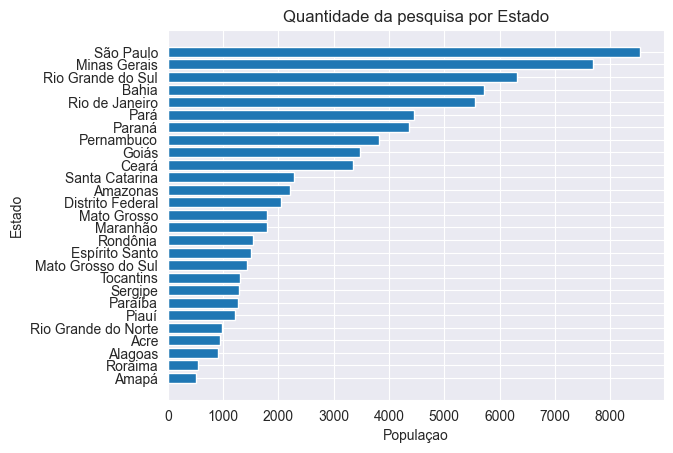

In [93]:
# Ordena o DataFrame 'estados' pela coluna 'count' em ordem crescente
estados_ordenado = estados.sort_values('count', ascending=True)

plt.barh(estados_ordenado['UF'], estados_ordenado['count'])
plt.xlabel('Populaçao')
plt.ylabel('Estado')
plt.title('Quantidade da pesquisa por Estado')
plt.show()

#### **Transforme as variáveis `Sexo`, `Cor` e `Anos.de.Estudo` em Categorical e observe o resultado**

**Dica 1:** Para te auxiliar neste processo, a célula abaixo traz os vetores com os valores de cada coluna na ordem desejada.

**Dica 2:** Utilize a tabela no início do documento para fazer a relação dos valores atuais para os desejados.

In [94]:
# Definindo as variáveis
sexo = {0: 'Masculino', 1: 'Feminino'}

cor = {0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda'}

anos_de_estudo = {1:'Sem instrução e menos de 1 ano', 2:'1 ano', 3:'2 anos', 4:'3 anos', 5:'4 anos', 6:'5 anos',
    7:'6 anos', 8:'7 anos', 9:'8 anos', 10:'9 anos', 11:'10 anos', 12:'11 anos', 13:'12 anos',14:'13 anos',
    15:'14 anos', 16:'15 anos ou mais', 17:'Não determinados'
}

##### Sexo

In [95]:
dados['sexo_biologico'] = pd.Categorical(
    dados['Sexo'],
    categories=sorted(dados['Sexo'].unique()))

In [96]:
sexo_biologico_labels = sexo
dados['sexo_biologico'] = dados['sexo_biologico'].map(sexo_biologico_labels)


In [97]:
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico
0,Rondônia,0,23,8,12,800,1.60,Masculino
1,Rondônia,1,23,2,12,1150,1.74,Feminino
2,Rondônia,1,35,8,15,880,1.76,Feminino
3,Rondônia,0,46,2,6,3500,1.78,Masculino
4,Rondônia,1,47,8,9,150,1.69,Feminino


In [98]:
sexo_quantidade = dados['sexo_biologico'].value_counts().reset_index()
sexo_quantidade

,sexo_biologico,count
0,Masculino,53250
1,Feminino,23590


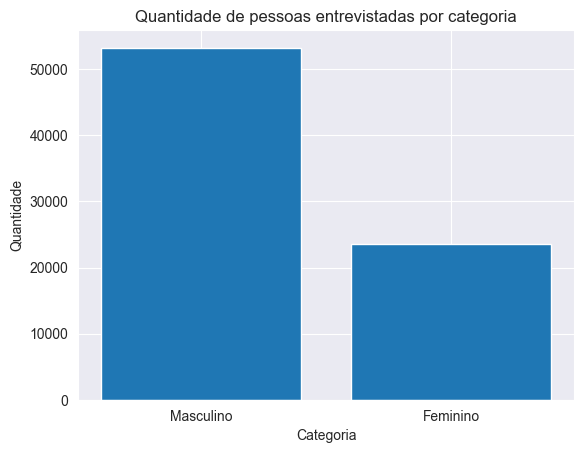

In [99]:
plt.bar(sexo_quantidade['sexo_biologico'], sexo_quantidade['count'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Quantidade de pessoas entrevistadas por categoria')
plt.show()

##### Cor

In [100]:
dados['cor_pele'] = pd.Categorical(
    dados['Cor'],
    categories=sorted(dados['Cor'].unique()))

In [101]:
cor_pele_labels = cor
dados['cor_pele'] = dados['cor_pele'].map(cor_pele_labels)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda


In [102]:
cor_quantidade = dados['cor_pele'].value_counts().reset_index()
cor_quantidade

,cor_pele,count
0,Parda,35925
1,Branca,31815
2,Preta,8391
3,Indígena,357
4,Amarela,352


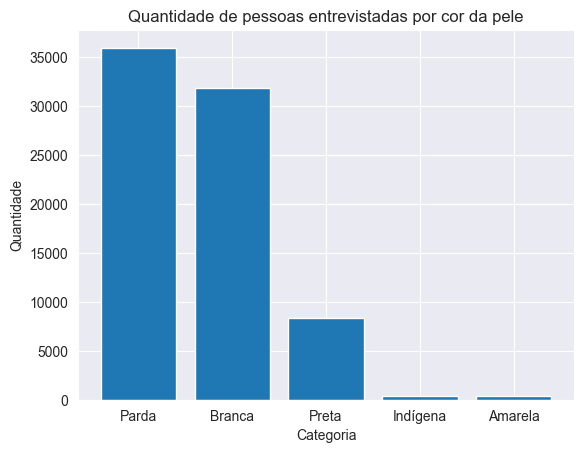

In [103]:
plt.bar(cor_quantidade['cor_pele'], cor_quantidade['count'])
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.title('Quantidade de pessoas entrevistadas por cor da pele')
plt.show()

##### Anos de Estudo

In [104]:
dados['anos_estudados'] = pd.Categorical(
    dados['Anos.de.Estudo'],
    categories=sorted(dados['Anos.de.Estudo'].unique()))

In [105]:
anos_estudados_labels = anos_de_estudo
dados['anos_estudados'] = dados['anos_estudados'].map(anos_estudados_labels)
dados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [106]:
anos_estudados_quantidade = dados['anos_estudados'].value_counts().reset_index()
anos_estudados_quantidade

,anos_estudados,count
0,11 anos,20848
1,15 anos ou mais,10795
2,8 anos,7980
3,4 anos,6729
4,Sem instrução e menos de 1 ano,5849
5,5 anos,4499
6,3 anos,2891
7,7 anos,2689
8,6 anos,2445
9,10 anos,2118


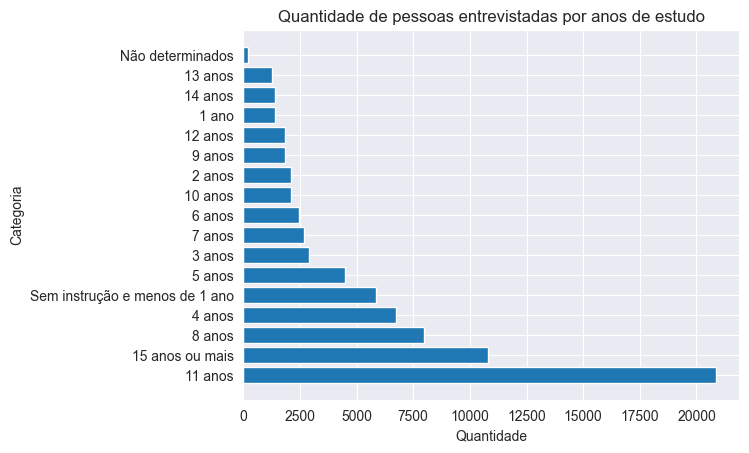

In [107]:
plt.barh(anos_estudados_quantidade['anos_estudados'], anos_estudados_quantidade['count'])
plt.xlabel('Quantidade')
plt.ylabel('Categoria')
plt.title('Quantidade de pessoas entrevistadas por anos de estudo')
plt.show()

### Aqui um exemplo de como calcular frequências

In [108]:
# Dados das preferências de transporte
transporte = [
    "Carro", "Ônibus", "Bicicleta", "Carro", "Metrô", "Ônibus",
    "Bicicleta", "Carro", "Metrô", "Bicicleta", "Carro", "Ônibus",
    "Bicicleta", "Carro", "Metrô", "Carro", "Ônibus", "Bicicleta",
    "Carro", "Metrô", "Ônibus", "Bicicleta", "Metrô", "Carro",
    "Bicicleta", "Carro", "Metrô", "Ônibus", "Carro", "Bicicleta",
    "Metrô", "Ônibus", "Carro", "Bicicleta", "Ônibus", "Metrô",
    "Carro", "Ônibus", "Metrô", "Bicicleta", "Carro", "Metrô",
    "Bicicleta", "Ônibus", "Carro", "Metrô", "Ônibus", "Bicicleta"
]

# Transformando em um DataFrame
df_transporte = pd.DataFrame(transporte, columns=['Meio_Transporte'])

# Calculando a distribuição de frequência e ordenando por frequência absoluta
tabela_freq = (
    df_transporte.groupby('Meio_Transporte')
    .size()
    .reset_index(name='Fi')  # Frequência absoluta
)

# Calculando a frequência relativa
tabela_freq['Fri'] = round(tabela_freq['Fi'] / tabela_freq['Fi'].sum(),2)

# Calculando a frequência acumulada
tabela_freq['F'] = tabela_freq['Fi'].cumsum()

# Calculando a frequência relativa acumulada
tabela_freq['Fri_acum'] = tabela_freq['Fri'].cumsum()

# Ordenando pela frequência absoluta
tabela_freq = tabela_freq.sort_values(by='Fi', ascending=False)

tabela_freq

,Meio_Transporte,Fi,Fri,F,Fri_acum
1,Carro,14,0.29,26,0.54
0,Bicicleta,12,0.25,12,0.25
2,Metrô,11,0.23,37,0.77
3,Ônibus,11,0.23,48,1.00


#### **Apresente em texto a menor e maior `Renda` da base de dados**

**Dica:** A renda é uma medida discreta. Utilizamos f-strings para formatar a string de forma mais legível e eficiente, substituindo diretamente as variáveis dentro da string

In [109]:
print(f"A menor Renda da base de dados é de R${min(dados['Renda']):,.2f} e a maior é de R$ {max(dados['Renda']):,.0f}")

A menor Renda da base de dados é de R$0.00 e a maior é de R$ 200,000


## **Aula 02 - Identificando o perfil do público**

### **Mão na Massa - Analisando o perfil das pessoas responsáveis**

Vamos prosseguir no treinamento, agora identificando o perfil das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015. Responda às perguntas abaixo e reflita sobre os achados.

#### **Construa uma tabela de frequências das pessoas responsáveis pelo domicílio por `Cat.Sexo`. Adicione também uma coluna com esse valor em porcentagem.**

In [110]:
dados

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


In [111]:
# Calculando a frequência absoluta
freq_sexo = dados.groupby('sexo_biologico', observed=False).size().reset_index(name='freq_absoluta')

freq_sexo

,sexo_biologico,freq_absoluta
0,Masculino,53250
1,Feminino,23590


In [112]:
freq_sexo['freq_relativa'] = round((freq_sexo['freq_absoluta'] / freq_sexo['freq_absoluta'].sum()) * 100, 1)
freq_sexo
     

,sexo_biologico,freq_absoluta,freq_relativa
0,Masculino,53250,69.3
1,Feminino,23590,30.7


In [113]:
freq_sexo.columns = ['Sexo', 'Quantidade', 'Porcentagem (%)']
freq_sexo

,Sexo,Quantidade,Porcentagem (%)
0,Masculino,53250,69.3
1,Feminino,23590,30.7


#### **Construa uma tabela de frequências absolutas e outra de relativas cruzando as variáveis `Cat.Sexo` e `Cat.Cor` das pessoas responsáveis pelo domicílio.**

In [114]:
dist_freq = pd.crosstab(dados['sexo_biologico'], dados['cor_pele'])
dist_freq    

cor_pele,Indígena,Branca,Preta,Amarela,Parda
sexo_biologico,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [115]:
freq_relativa = round(pd.crosstab(dados['sexo_biologico'], dados['cor_pele'], normalize = 'all') * 100,2)
freq_relativa   

cor_pele,Indígena,Branca,Preta,Amarela,Parda
sexo_biologico,,,,,
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa uma tabela cruzada para calcular a `Renda` média das pessoas responsáveis pelo domicílio em relação ao `Cat.Sexo` e `Cat.Cor`.**

In [116]:
ticket_medio = round(pd.crosstab(dados['sexo_biologico'], dados['cor_pele'], values=dados['Renda'], aggfunc='mean'), 2)

ticket_medio

cor_pele,Indígena,Branca,Preta,Amarela,Parda
sexo_biologico,,,,,
Masculino,1081.71,2925.74,1603.86,4758.25,1659.58
Feminino,2464.39,2109.87,1134.60,3027.34,1176.76


> #### Conclusões

Escreva suas conclusões aqui...

In [117]:
import pandas as pd
import numpy as np

# Definindo a semente para garantir resultados reproduzíveis
np.random.seed(123)

# Criando o conjunto de dados fictício
estilos_musicais = ["Rock", "Pop", "Eletrônica", "Funk", "Sertanejo"]
regioes = ["Centro-Oeste", "Nordeste", "Norte", "Sudeste", "Sul"]

# Gerando 500 amostras para cada variável
dados_musica = pd.DataFrame({
    'Estilo_Musical': np.random.choice(estilos_musicais, 500, replace=True),
    'Regiao': np.random.choice(regioes, 500, replace=True)
})

dados_musica.head()

,Estilo_Musical,Regiao
0,Eletrônica,Sul
1,Sertanejo,Norte
2,Eletrônica,Nordeste
3,Pop,Sudeste
4,Funk,Nordeste


In [118]:
tab_musical_regiao = pd.crosstab(dados_musica['Estilo_Musical'], dados_musica['Regiao'])

tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,22,14,15,21,21
Funk,27,24,12,26,15
Pop,19,25,20,26,18
Rock,22,23,17,22,15
Sertanejo,14,12,22,25,23


In [119]:
tab_musical_regiao = round(pd.crosstab(dados_musica['Estilo_Musical'], dados_musica['Regiao'], normalize = 'columns') * 100,1)
tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,21.2,14.3,17.4,17.5,22.8
Funk,26.0,24.5,14.0,21.7,16.3
Pop,18.3,25.5,23.3,21.7,19.6
Rock,21.2,23.5,19.8,18.3,16.3
Sertanejo,13.5,12.2,25.6,20.8,25.0


In [120]:
tab_musical_regiao = round(pd.crosstab(dados_musica['Estilo_Musical'], dados_musica['Regiao'], normalize = 'index') * 100,1)
tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,23.7,15.1,16.1,22.6,22.6
Funk,26.0,23.1,11.5,25.0,14.4
Pop,17.6,23.1,18.5,24.1,16.7
Rock,22.2,23.2,17.2,22.2,15.2
Sertanejo,14.6,12.5,22.9,26.0,24.0


In [121]:
tab_musical_regiao = round(pd.crosstab(dados_musica['Estilo_Musical'], dados_musica['Regiao'], normalize = 'all') * 100,1)
tab_musical_regiao

Regiao,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
Estilo_Musical,,,,,
Eletrônica,4.4,2.8,3.0,4.2,4.2
Funk,5.4,4.8,2.4,5.2,3.0
Pop,3.8,5.0,4.0,5.2,3.6
Rock,4.4,4.6,3.4,4.4,3.0
Sertanejo,2.8,2.4,4.4,5.0,4.6


## **Aula 03 - Analisando a tendência dos dados**

### **Mão na Massa - Analisando a renda das pessoas responsáveis**

Nesta etapa do treinamento, vamos analisar mais dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, focando na renda e na variável que criamos com as suas alturas. Responda às perguntas abaixo e reflita sobre os achados.

#### **Calcule as medidas de tendência central (média, mediana e moda) para a variável `Renda`**

In [122]:
round(dados.Renda.mean(), 2)

np.float64(2000.38)

In [123]:
dados.Renda.median()

np.float64(1200.0)

In [124]:
moda = dados.Renda.mode()

In [125]:
frequencia = dados[dados['Renda'].isin(moda.values)]
frequencia.Renda.value_counts()

Renda
788    6881
Name: count, dtype: int64

#### **Crie um gráfico de barras do Top 5 estados pela médias de `Renda`**

**Dica:** Para conseguir apresentar apenas os Top 5 estados utilize a função `head()` passando como variável quantos valores deseja apresentar.

In [126]:
dados.head(3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos


In [127]:
# Calculando a média de renda por UF
top5_renda = dados.groupby('UF').agg(media=('Renda', 'mean')).reset_index()

# Ordenando e selecionando os 5 estados com as maiores médias de renda
top5_renda = round(top5_renda.sort_values(by='media', ascending=False).head(5),2)

top5_renda

,UF,media
6,Distrito Federal,4241.95
25,São Paulo,2638.10
20,Rio de Janeiro,2496.40
13,Paraná,2493.87
23,Santa Catarina,2470.85


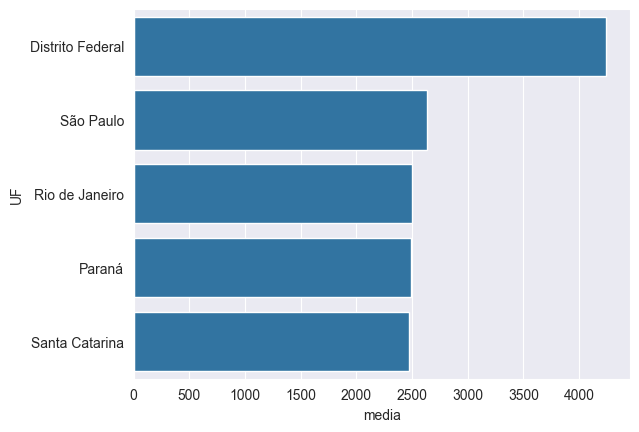

In [128]:
sns.barplot(data=top5_renda, x='media', y='UF')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 3 tabelas cruzadas calculando a média, mediana e valores máximos de `Renda` relacionando as pessoas responsáveis por estado da Região Sudeste (`UF`) e por `Cat.Sexo`**

In [129]:
dados_sudeste = dados[dados['UF'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'])]

dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,8 anos
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,11 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,11 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,4 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,15 anos ou mais


##### **Média**

In [130]:
renda_media = round(pd.crosstab(dados_sudeste['sexo_biologico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='mean'), 2)

renda_media

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_biologico,,,,
Masculino,2129.32,2283.16,2777.55,2947.74
Feminino,1752.71,1489.62,1971.53,1950.18


##### **Mediana**

In [131]:
renda_mediana = round(pd.crosstab(dados_sudeste['sexo_biologico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='median'), 2)

renda_mediana

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_biologico,,,,
Masculino,1500.0,1400.0,1510.0,1820.0
Feminino,927.0,900.0,1040.5,1200.0


##### **Renda Máxima**

In [132]:
renda_max = round(pd.crosstab(dados_sudeste['sexo_biologico'], dados_sudeste['UF'], values=dados_sudeste['Renda'], aggfunc='max'), 2)

renda_max

UF,Espírito Santo,Minas Gerais,Rio de Janeiro,São Paulo
sexo_biologico,,,,
Masculino,40000,100000,200000,80000
Feminino,100000,30000,120000,50000


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa 2 histogramas com curva de densidade com os valores das colunas `Altura` e `Idade` de todas as pessoas responsáveis e compare as curvas obtidas com as suas  MTCs**

##### **Altura**

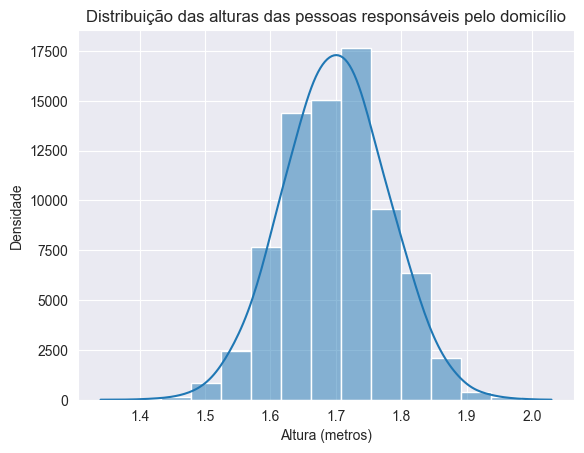

In [133]:
sns.histplot(bins=15, data=dados, x='Altura', kde=True, kde_kws={'bw_adjust':2})

plt.title('Distribuição das alturas das pessoas responsáveis pelo domicílio')
plt.xlabel('Altura (metros)')
plt.ylabel('Densidade')

plt.show()

In [134]:
altura_resumo = {
    'media': round(dados['Altura'].mean(),2),
    'mediana': dados['Altura'].median(),
    'moda': dados['Altura'].mode()[0]
}

altura_resumo

{'media': np.float64(1.7), 'mediana': np.float64(1.7), 'moda': np.float64(1.7)}

> #### Conclusões

Escreva suas conclusões aqui...

##### **Idade**

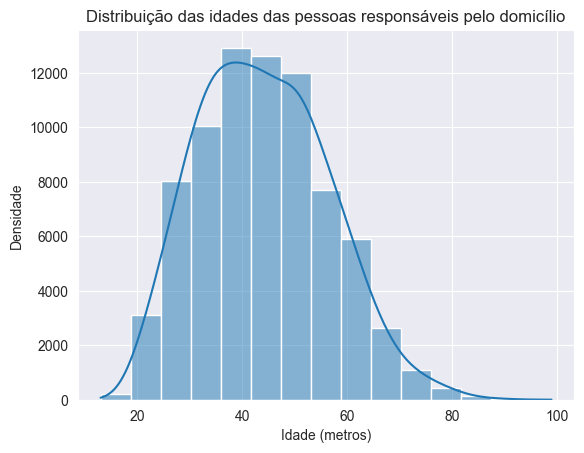

In [135]:
sns.histplot(bins=15, data=dados, x='Idade', kde=True, kde_kws={'bw_adjust':2})

plt.title('Distribuição das idades das pessoas responsáveis pelo domicílio')
plt.xlabel('Idade (metros)')
plt.ylabel('Densidade')

plt.show()

In [136]:
idade_resumo = {
    'media': round(dados['Idade'].mean(),2),
    'mediana': dados['Idade'].median(),
    'moda': dados['Idade'].mode()[0]
}

idade_resumo

{'media': np.float64(44.07), 'mediana': np.float64(43.0), 'moda': np.int64(40)}

> #### Conclusões

Escreva suas conclusões aqui...

Diferença entre Média e Mediana
Um tema bem importante é a análise da diferença entre a média e a mediana. Dizemos anteriormente que a média é sensível a valores extremos ou outliers.

Por exemplo, em uma empresa, se a maioria dos funcionários ganha entre R$ 2.000 e R$ 5.000, mas o CEO ganha R$ 50.000, a média salarial será puxada para cima, não refletindo a realidade da maioria dos funcionários. A mediana, neste caso, seria uma medida mais adequada, pois não seria tão influenciada pelo salário do CEO.

Ou seja, a análise pela mediana é mais vantajosa que a média quando você está lidando com dados mais assimétricos ou quando há outliers significativos.

Vamos considerar um conjunto de dados hipotético sobre os salários em uma pequena empresa para ilustrar a diferença entre média e mediana em uma visualização:

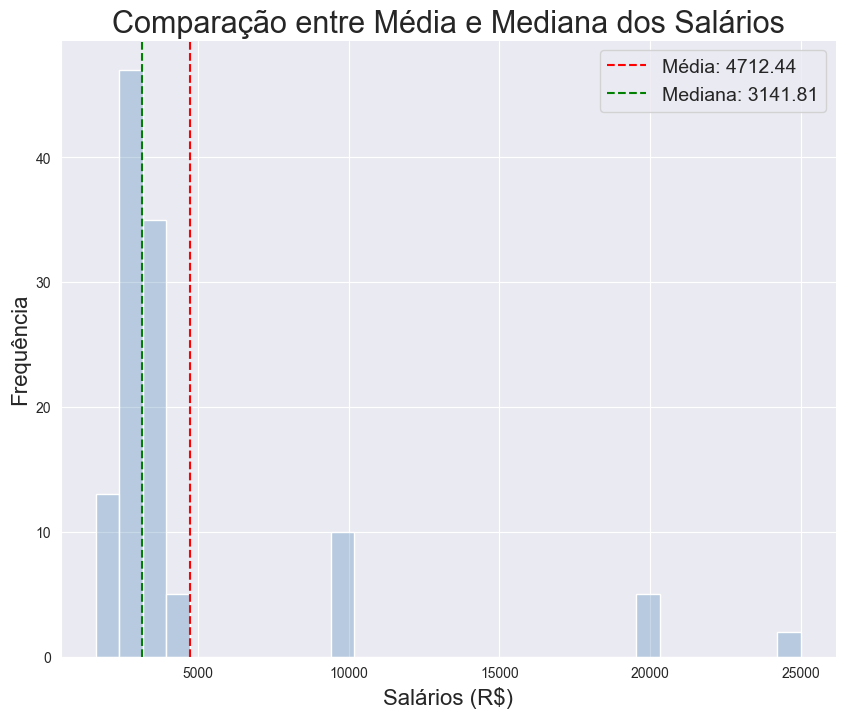

In [137]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo a semente para garantir resultados reproduzíveis
np.random.seed(123)

# Simulando dados de salários
salarios = np.concatenate([np.random.normal(3000, 500, 100), [10000] * 10, [20000] * 5, [25000] * 2])

# Criando o DataFrame
dados_salarios = pd.DataFrame(salarios, columns=['salarios'])

# Calculando a média e a mediana
media_salarios = dados_salarios['salarios'].mean()
mediana_salarios = dados_salarios['salarios'].median()

# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

sns.set_style('darkgrid')
# Criando o histograma e a linha de densidade
sns.histplot(dados_salarios['salarios'], bins=30, color='steelblue', alpha=0.3)

# Adicionando as linhas para média e mediana
plt.axvline(media_salarios, color="red", linestyle="--", label=f'Média: {media_salarios:.2f}')
plt.axvline(mediana_salarios, color="green", linestyle="--", label=f'Mediana: {mediana_salarios:.2f}')

# Adicionando título e rótulos aos eixos
plt.title("Comparação entre Média e Mediana dos Salários", fontsize=22, ha='center')
plt.xlabel("Salários (R$)", fontsize=16)
plt.ylabel("Frequência", fontsize=16)

sns.despine()

# Adicionando a legenda
plt.legend(title='', fontsize=14)

plt.show()

In [138]:
dados.salarios.mode()

AttributeError: 'DataFrame' object has no attribute 'salarios'

Durante o verão, o consumo de energia aumenta devido ao uso de ar condicionado. No entanto, algumas residências, especialmente as desocupadas ou com sistemas de energia eficientes, apresentam consumos muito baixos, o que pode resultar em uma distribuição assimétrica à esquerda.

Vamos simular esses dados para consumo mensal a fim de compreender a distribuição. A função rvs() gera 10.000 amostras de uma distribuição Beta com parâmetros a = 10 e b = 4.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import beta

# Definir a semente para garantir resultados reproduzíveis
np.random.seed(42)

# Gerando os dados de consumo de energia (distribuição Beta com parâmetros a=10, b=4)
consumo_energia = 2 * np.round(100 * beta.rvs(10, 4, size=10000), 0)

# Criando o DataFrame
df_consumo = pd.DataFrame(consumo_energia, columns=['Consumo'])

# Exibindo as primeiras linhas
df_consumo.head()

,Consumo
0,154.0
1,146.0
2,148.0
3,126.0
4,182.0


In [ ]:
# Agora, vamos calcular as medidas de tendência central para ter uma noção da distribuição dos dados:
# Exibindo as medidas
medidas = {
    'media': df_consumo['Consumo'].mean(),
    'mediana': df_consumo['Consumo'].median(),
    'moda': df_consumo['Consumo'].mode()[0]
}
medidas

media = df_consumo['Consumo'].mean()
mediana = df_consumo['Consumo'].median()
moda = df_consumo['Consumo'].mode()[0]

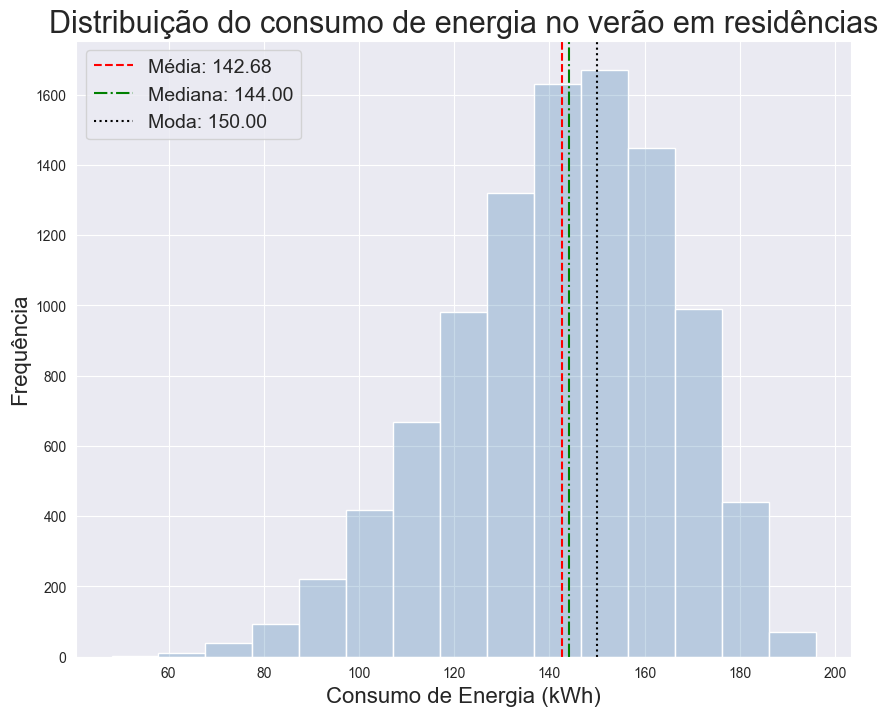

In [ ]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

sns.set_style('darkgrid')

# Criando o histograma
sns.histplot(df_consumo['Consumo'], bins=15, color='steelblue', alpha=0.3)

# Adicionando as linhas para média, mediana e moda
plt.axvline(media, color="red", linestyle="--", label=f'Média: {media:.2f}')
plt.axvline(mediana, color="green", linestyle="-.", label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color="black", linestyle=":", label=f'Moda: {moda:.2f}')

# Títulos e rótulos
plt.title('Distribuição do consumo de energia no verão em residências', fontsize=22, ha='center')
plt.xlabel('Consumo de Energia (kWh)', fontsize=16)
plt.ylabel('Frequência', fontsize=16)

# Adicionando a legenda
plt.legend(title='', fontsize=14)

# Exibindo o gráfico
plt.show()

Alguns comportamentos interessantes que podemos observar aqui:

Média: tem menor valor porque é influenciada pelos valores mais baixos.
Mediana: representa o ponto central, menos afetado pelos extremos que a média.
Moda: reflete o valor mais comum, concentrado em um ponto alto na distribuição.
Simetria da Distribuição: a relação moda > mediana > médiademonstra que a distribuição é assimétrica à esquerda. Assim, identificar assimetria ajuda a decidir se transformações (como log ou raiz quadrada) são necessárias para análises estatísticas e os candidatos a outliers podem ser explorados para entender padrões incomuns no consumo.

Conseguimos observar que a análise das relações entre média, mediana e moda é uma etapa essencial na exploração de dados. Essas medidas ajudam a entender padrões, identificar extremos e guiar decisões sobre ajustes ou modelagens futuras. A abordagem visual também facilitou a comunicação dessas características.

## **Aula 04 - Investigando os dados dos colaboradores**

### **Mão na Massa - Analisando as rendas e suas divisões**

Nesta etapa do treinamento, vamos analisar os dados das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, por meio das medidas separatrizes. Responda às perguntas abaixo e reflita sobre os achados.


#### **Calcule o número de classes para `Renda` até R$15.000 utilizando a regra de Sturges**

$$k = 1 + \frac {10}{3}\log_{10}n$$

onde,

$k$ = número de classes

$n$ = número de observações.


In [ ]:
renda_15k = dados[dados['Renda'] <= 15000]
renda_15k.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos


In [ ]:
n = len(renda_15k)
n

76219

In [ ]:
import math

In [ ]:
k = 1 + (10/3) * math.log10(n)
k

17.273544154972114

In [ ]:
k = int(k)
k

17

#### **Crie o histograma da `Renda` das pessoas responsáveis até R$15.000 seguindo o número de classes calculado anteriormente**

> **Observação:** Ao rodar o código para dividir os dados em faixas é possível que você observe o limite inferior da 1ª faixa com um valor negativo. Isto porque a *Regra de Sturges* define o intervalo mínimo da 1ª classe pela seguinte fórmula: $min(Renda) - (max(Renda) - min(Renda)) * 0.001$.



In [ ]:
faixas = renda_15k.copy()

# Definindo os intervalos usando a função cut()
faixas['faixa_renda'] = pd.cut(faixas['Renda'], bins=int(k), include_lowest=True)

# Exibindo o resultado
faixas.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados,faixa_renda
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos,"(-15.001, 882.353]"
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos,"(882.353, 1764.706]"
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos,"(-15.001, 882.353]"
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos,"(2647.059, 3529.412]"
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos,"(-15.001, 882.353]"


In [ ]:
# 1. Agrupando por faixa_renda e calculando frequências e porcentagens
tabela_frequencias = faixas.groupby('faixa_renda',observed=False ).size().reset_index(name='frequencia')

# 2. Calculando a porcentagem
tabela_frequencias['porcentagem'] = (tabela_frequencias['frequencia'] / len(faixas)) * 100

tabela_frequencias

,faixa_renda,frequencia,porcentagem
0,"(-15.001, 882.353]",26311,34.520264
1,"(882.353, 1764.706]",25816,33.870820
2,"(1764.706, 2647.059]",10905,14.307456
3,"(2647.059, 3529.412]",4854,6.368491
4,"(3529.412, 4411.765]",2133,2.798515
5,"(4411.765, 5294.118]",2180,2.860179
6,"(5294.118, 6176.471]",1002,1.314633
7,"(6176.471, 7058.824]",672,0.881670
8,"(7058.824, 7941.176]",208,0.272898
9,"(7941.176, 8823.529]",554,0.726853


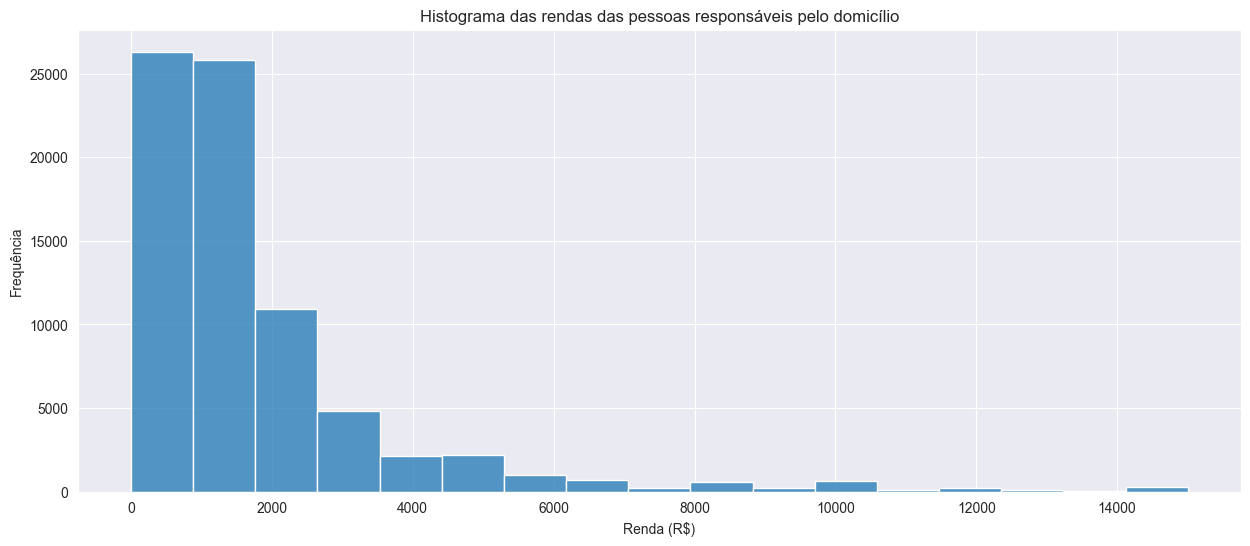

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(bins= k, data=renda_15k, x='Renda')
plt.title('Histograma das rendas das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')
plt.ylabel('Frequência')
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

#### **Responda as seguintes questões sobre o nosso dataset completo utilizando os conceitos que estudamos até aqui:**

##### **1. Qual o percentual de pessoas responsáveis que ganhava até um salário mínimo em 2015 (R$ 788,00)?**



In [ ]:
percentual = (dados['Renda'] <= 788).sum() / len(dados) * 100
percentual

np.float64(28.86777719937533)

##### **2. Qual a renda máxima de 95% das pessoas responsáveis na pesquisa?**


In [ ]:
dados['Renda'].quantile(0.95)

np.float64(6000.0)

##### **3.   Qual a renda mínima dos 1% mais bem pagos da pesquisa?**

In [ ]:
dados['Renda'].quantile(0.99)

np.float64(15000.0)

##### **4. Qual a renda máxima de 25%, 50% e 75% das pessoas responsáveis que receberam até R$ 6.000 de rendimento mensal? Construa o boxplot e traga o resumo desses dados.**


In [ ]:
renda_6k = dados[dados['Renda'] <= 6000]
renda_6k

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
0,Rondônia,0,23,8,12,800,1.60,Masculino,Parda,11 anos
1,Rondônia,1,23,2,12,1150,1.74,Feminino,Branca,11 anos
2,Rondônia,1,35,8,15,880,1.76,Feminino,Parda,14 anos
3,Rondônia,0,46,2,6,3500,1.78,Masculino,Branca,5 anos
4,Rondônia,1,47,8,9,150,1.69,Feminino,Parda,8 anos
...,...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,1,46,2,11,812,1.69,Feminino,Branca,10 anos
76836,Distrito Federal,0,30,4,7,1500,1.79,Masculino,Preta,6 anos
76837,Distrito Federal,0,32,8,12,1300,1.83,Masculino,Parda,11 anos
76838,Distrito Federal,0,57,8,4,1500,1.73,Masculino,Parda,3 anos


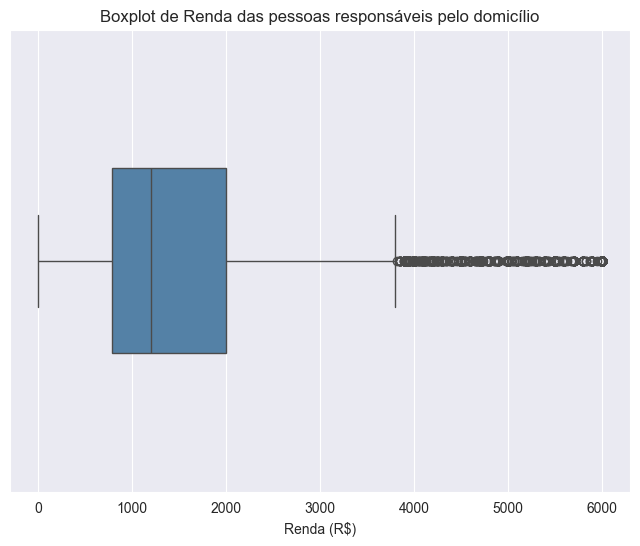

In [ ]:
# Criando o boxplot com seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=renda_6k['Renda'], color='steelblue')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot de Renda das pessoas responsáveis pelo domicílio')
plt.xlabel('Renda (R$)')

# Ajustando os limites do eixo Y (o equivalente ao scale_y_continuous no ggplot2)
plt.ylim(-1, 1)

# Exibindo o gráfico
plt.show()

In [ ]:
# Calculando os quartis
resumo_renda_6k = {
    'Q1': renda_6k['Renda'].quantile(0.25),
    'Q2': renda_6k['Renda'].quantile(0.50),
    'Q3': renda_6k['Renda'].quantile(0.75)
}

# Exibindo os resultados
resumo_renda_6k

{'Q1': np.float64(788.0), 'Q2': np.float64(1200.0), 'Q3': np.float64(2000.0)}

> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa o boxplot da `Renda` até o percentil 95% (`renda_6k`) das pessoas responsáveis por `Cat.Sexo` e `Cat.Cor`. Interprete o resultado.**

**Dica:** Para incluir uma 3ª variável na construção de um boxplot, utilize o parâmetro `hue` da seguinte maneira: `(x = Renda, y = Cat.Cor, hue = Cat.Sexo)`.

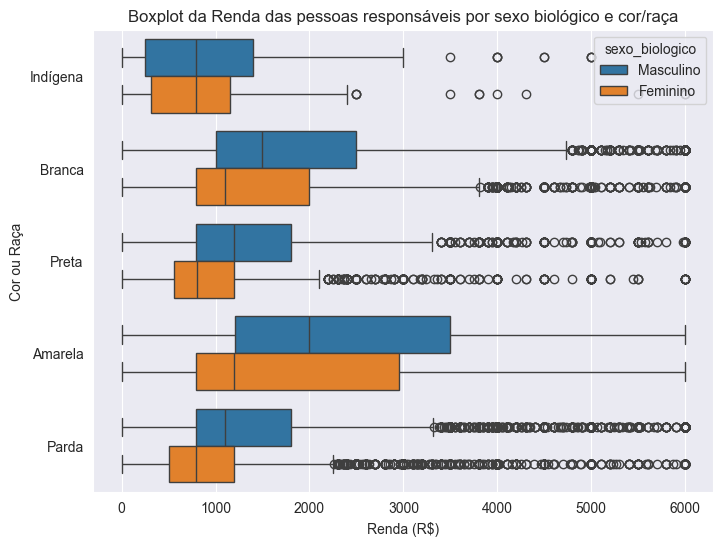

In [ ]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='cor_pele', data=renda_6k, hue='sexo_biologico')

# Adicionando título e rótulos aos eixos
plt.title('Boxplot da Renda das pessoas responsáveis por sexo biológico e cor/raça')
plt.xlabel('Renda (R$)')
plt.ylabel('Cor ou Raça')

# Exibindo o gráfico
plt.show()

#### **Qual a idade limite para 20% da população? Construa o histograma acumulado com curva de densidade, definindo a idade limite e quantas pessoas se encaixam nessa porcentagem.**

**Dica:** Para ler os últimos valores de um DataFrame utilize a função `tail()`.

Exemplo: `df.tail(3)` lê os ultimos 3 registros do DataFrame `df`.

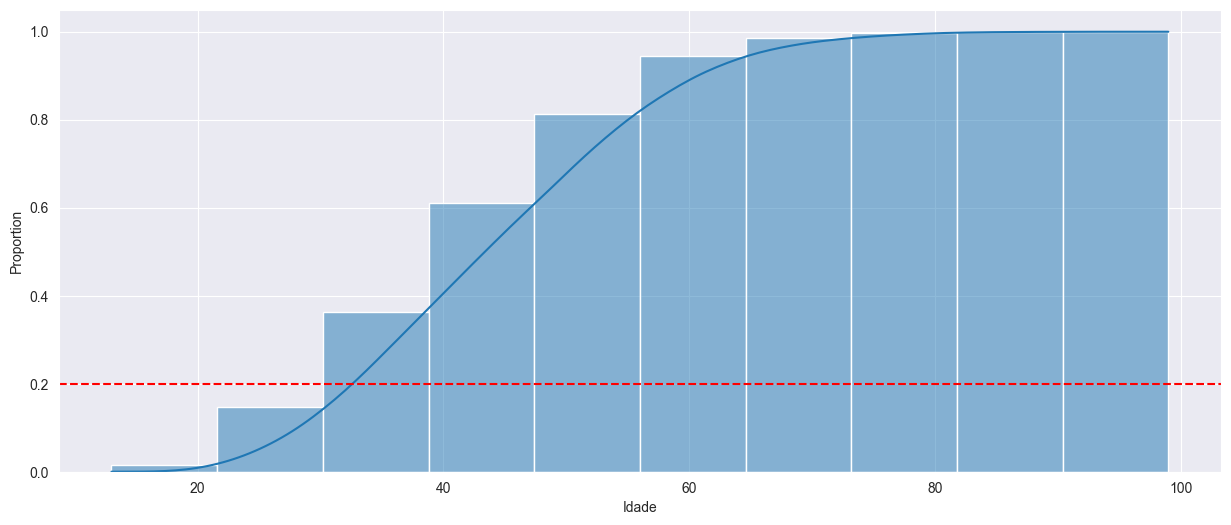

In [ ]:
plt.figure(figsize=(15, 6))
sns.histplot(data=dados, x='Idade', bins= 10, cumulative=True, stat='proportion', kde=True )
plt.axhline(0.20, color='red', linestyle='dashed')

plt.show()

In [ ]:
idades_classificacao = dados.copy()

In [ ]:
# 1. Ordenar os dados pela coluna 'idade'
idades_classificacao = idades_classificacao.sort_values(by='Idade')

# 2. Adicionar a coluna 'cumulativo' (posição relativa de cada linha)
idades_classificacao['cumulativo'] = (idades_classificacao.reset_index().index + 1) / len(idades_classificacao)

# 3. Adicionar a coluna 'qualificado' com base no valor de 'cumulativo'
idades_classificacao['qualificado'] = idades_classificacao['cumulativo'] <= 0.20

# Exibindo o resultado
idades_classificacao.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True


In [ ]:
idades_classificacao.tail(3)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados,cumulativo,qualificado
1789,Acre,0,95,8,9,500,1.86,Masculino,Parda,8 anos,0.999974,False
11834,Maranhão,0,97,0,1,0,1.76,Masculino,Indígena,Sem instrução e menos de 1 ano,0.999987,False
74079,Goiás,0,99,4,1,0,1.65,Masculino,Preta,Sem instrução e menos de 1 ano,1.000000,False


In [ ]:
idades_qualificados = idades_classificacao[idades_classificacao['qualificado'] == True]
idades_qualificados.head()

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados,cumulativo,qualificado
2798,Amazonas,0,13,8,6,100,1.61,Masculino,Parda,5 anos,0.000013,True
40579,Espírito Santo,0,14,8,4,300,1.65,Masculino,Parda,3 anos,0.000026,True
13158,Maranhão,1,15,4,9,200,1.53,Feminino,Preta,8 anos,0.000039,True
1426,Rondônia,0,15,4,6,400,1.64,Masculino,Preta,5 anos,0.000052,True
35197,Minas Gerais,1,15,8,3,0,1.81,Feminino,Parda,2 anos,0.000065,True


In [ ]:
len(idades_qualificados)

15368

## Distribuindo os salários dos colaboradores por faixas personalizadas
Estamos trabalhando com o dataset colaboradores da empresa varejista que está sob nossa consultoria. O objetivo é construir uma tabela de frequência com base em classes salariais personalizadas, considerando o salário mínimo (SM) de R$ 1.412,00, e visualizar os dados em um gráfico de barras para identificar as faixas salariais mais representativas.

As classes são definidas como:

##### A: Acima de 12 SM → Acima de R$16.944
##### B: De 8 a 12 SM → Entre R$ 11.296 e R$ 16.944
##### C: De 4 a 8 SM → Entre R$ 5.648 e R$ 11.296
##### D: De 2 a 4 SM → Entre R$ 2.824 e R$ 5.648
##### E: Até 2 SM → Até R$ 2.824

Vamos começar lendo os dados e criando as classes de acordo com o salário mínimo na época da pesquisa. Vamos passar também para as classes os valores mínimos e máximos de remuneração que serão importantes para dividir as classes utilizando a função cut.

In [ ]:
# Carregando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
url = "https://raw.githubusercontent.com/alura-cursos/estatistica-r-frequencias-medidas/refs/heads/main/dados/colaboradores.csv"
colaboradores = pd.read_csv(url)

# Definindo o salário mínimo e classes
sm = 1412

# Definindo as classes salariais com base no salário mínimo
classes = [colaboradores['remuneracao'].min(), sm * 2, sm * 4, sm * 8, sm * 12, colaboradores['remuneracao'].max()]

classes

[np.float64(1920.57), 2824, 5648, 11296, 16944, np.float64(32084.55)]

In [ ]:
# Definindo as classes salariais com base nas faixas
labels = ['E', 'D', 'C', 'B', 'A']
colaboradores['faixa_salarial'] = pd.cut(colaboradores['remuneracao'], bins=classes, labels=labels, right=True, include_lowest=True)

colaboradores

,id_colaborador,nome,sexo_biologico,idade,cargo,nota_desempenho,remuneracao,faixa_salarial
0,DIR000001,Théo Sales,Masculino,45,Diretor(a),Bom,29950.79,A
1,DIR000002,Isis Pinto,Feminino,45,Diretor(a),Bom,27261.07,A
2,DIR000003,Isabelly Garcia,Feminino,45,Diretor(a),Bom,25635.61,A
3,DIR000004,Nina Pereira,Feminino,45,Diretor(a),Excelente,27678.60,A
4,DIR000005,Otávio Azevedo,Masculino,46,Diretor(a),Excelente,32084.55,A
...,...,...,...,...,...,...,...,...
11085,REP011086,Nicolas Mendes,Masculino,40,Repositor(a),Bom,3340.72,D
11086,REP011087,Maria Luísa Câmara,Feminino,48,Repositor(a),Insuficiente,3330.98,D
11087,REP011088,Allana da Mota,Feminino,28,Repositor(a),Excelente,3382.03,D
11088,REP011089,Bruno Rezende,Masculino,36,Repositor(a),Bom,3088.46,D


In [ ]:
# Tabela de frequência das faixas salariais
frequencias = colaboradores['faixa_salarial'].value_counts().sort_index()

frequencias

# Agrupar por faixa salarial e calcular a frequência e porcentagem
classes_salariais = colaboradores.groupby('faixa_salarial', observed=False ).size().reset_index(name='frequencia')

# Calcular a porcentagem
classes_salariais['porcentagem'] = (classes_salariais['frequencia'] / len(colaboradores)) * 100

# Ordenar pelas classes salariais
classes_salariais = classes_salariais.sort_values(by='faixa_salarial')

classes_salariais

,faixa_salarial,frequencia,porcentagem
0,E,948,8.548242
1,D,8070,72.768260
2,C,1944,17.529306
3,B,93,0.838593
4,A,35,0.315600


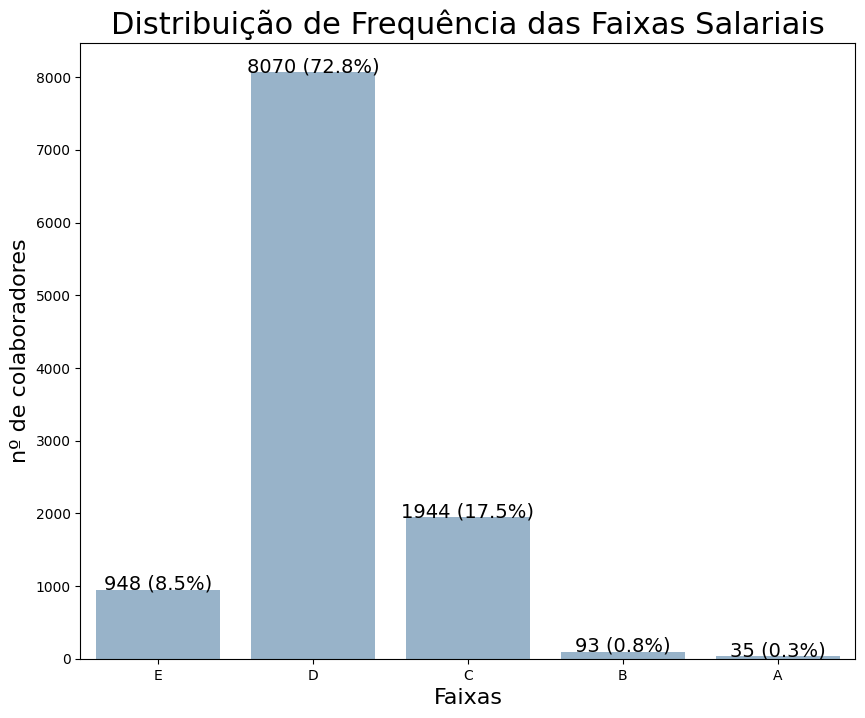

In [ ]:
# Ajustando o tamanho do gráfico
plt.figure(figsize=(10, 8))

# Criando o gráfico de barras
sns.barplot(x='faixa_salarial', y='frequencia', data=classes_salariais, color='steelblue', alpha=0.6)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Frequência das Faixas Salariais', fontsize=22, ha='center')
plt.xlabel('Faixas', fontsize=16)
plt.ylabel('nº de colaboradores', fontsize=16)

# Adicionando rótulos de frequência e porcentagem acima das barras
for i, row in classes_salariais.iterrows():
    plt.text(i, row['frequencia'] + 2, f"{row['frequencia']} ({round(row['porcentagem'], 1)}%)",
             ha='center', fontsize=14)

# Exibindo o gráfico
plt.show()

> #### Conclusões

Escreva suas conclusões aqui...

## **Aula 05 - Analisando a variação dos dados**

### **Mão na Massa - Analisando a variação da Renda das pessoas responsáveis**

Nesta última etapa do treinamento, vamos analisar os dados de renda das pessoas responsáveis pelo domicílio de acordo com os dados da PNAD de 2015, calculando a variação desta para determinadas características da amostra. Responda às perguntas abaixo e reflita sobre os achados.


#### **Responda as seguintes questões sobre o nosso dataset utilizando os conceitos que estudamos até aqui:**

##### **1.   Qual o desvio médio absoluto, a variância e desvio padrão da renda das pessoas responsáveis na pesquisa?**





In [ ]:
estat_renda = dados['Renda'].agg(
    media='mean',
    mediana='median',
    mad=lambda x: (abs(x - x.mean())).mean()
).reset_index()

# Exibindo o resultado
round(estat_renda,2)

,index,Renda
0,media,2000.38
1,mediana,1200.00
2,mad,1526.50


##### **2. Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas em relação aos Anos de Estudo. O que podemos interpretar com esses dados?**

In [141]:
estat_renda_anos_estudo = dados.groupby('anos_estudados', observed=False)['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_anos_estudo

,anos_estudados,media,mediana,desvio_padrao
0,Sem instrução e menos de 1 ano,732.994187,600.0,955.274843
1,1 ano,806.524496,700.0,1203.866292
2,2 anos,842.560209,788.0,1298.873800
3,3 anos,980.044275,788.0,1907.138437
4,4 anos,1150.439293,900.0,1293.144934
5,5 anos,1183.575683,940.0,1328.709017
6,6 anos,1284.082618,1000.0,1326.140204
7,7 anos,1289.166233,1000.0,1279.412081
8,8 anos,1437.744862,1100.0,1404.280340
9,9 anos,1315.685870,1000.0,1888.373952


> #### Conclusões

Escreva suas conclusões aqui...

##### **3.   Construa uma tabela com a média, mediana e desvio padrão para a renda das pessoas do sexo biológico masculino e feminino até R$ 15.000. O que podemos interpretar com esses dados?**

In [143]:
estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('sexo_biologico')['Renda'].agg(
    media='mean',
    mediana='median',
    desvio_padrao='std'
).reset_index()
estat_renda_sexo

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16396\3767548504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  estat_renda_sexo = dados[dados['Renda'] <= 15000].groupby('sexo_biologico')['Renda'].agg(


,sexo_biologico,media,mediana,desvio_padrao
0,Masculino,1964.351997,1300.0,2101.163468
1,Feminino,1460.143630,900.0,1763.686374


> #### Conclusões

Escreva suas conclusões aqui...

#### **Construa um boxplot da `Renda` dos estados da Região Centro-Oeste até R$ 10.000 segundo o `Cat.Sexo`. Para interpretar o resultado construa 3 tabelas com cada uma das estatísticas descritivas (média, mediana e desvio padrão).**

In [144]:
renda_10k_centro_oeste = dados[dados['UF'].isin(['Goiás', 'Distrito Federal', 'Mato Grosso', 'Mato Grosso do Sul', 'Tocantins']) & (dados['Renda'] <=10e3)]
dados_sudeste

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,sexo_biologico,cor_pele,anos_estudados
31818,Minas Gerais,0,40,2,12,1600,1.62,Masculino,Branca,11 anos
31819,Minas Gerais,0,58,8,5,850,1.58,Masculino,Parda,4 anos
31820,Minas Gerais,0,36,8,3,1400,1.75,Masculino,Parda,2 anos
31821,Minas Gerais,0,21,8,11,1500,1.66,Masculino,Parda,10 anos
31822,Minas Gerais,0,28,2,9,1600,1.62,Masculino,Branca,8 anos
...,...,...,...,...,...,...,...,...,...,...
55110,São Paulo,0,52,8,12,1500,1.82,Masculino,Parda,11 anos
55111,São Paulo,0,30,8,12,1500,1.48,Masculino,Parda,11 anos
55112,São Paulo,0,43,8,5,1100,1.72,Masculino,Parda,4 anos
55113,São Paulo,1,51,8,16,1600,1.75,Feminino,Parda,15 anos ou mais


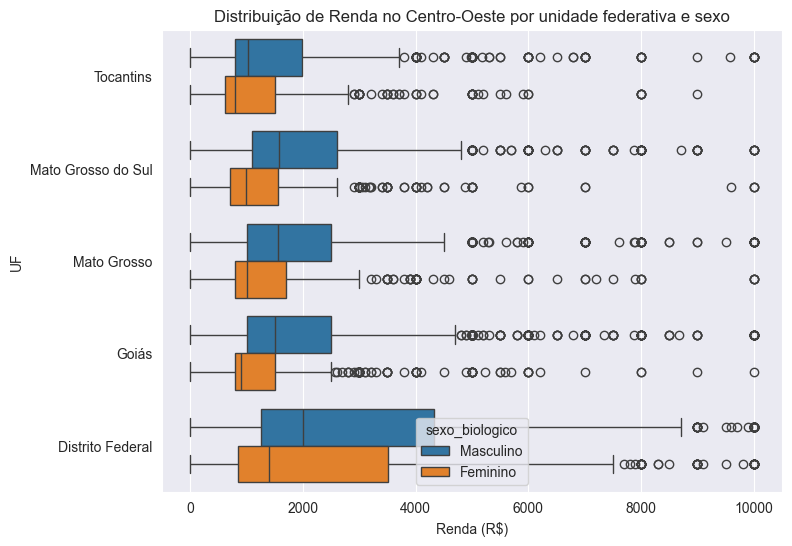

In [146]:
# Criando o boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Renda', y='UF', data=renda_10k_centro_oeste, hue='sexo_biologico')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição de Renda no Centro-Oeste por unidade federativa e sexo')
plt.xlabel('Renda (R$)')
plt.ylabel('UF')

# Exibindo o gráfico
plt.show()

##### **Média**

In [148]:
renda_10k_centro_oeste_media = round(pd.crosstab(renda_10k_centro_oeste['sexo_biologico'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='mean'), 2)

renda_10k_centro_oeste_media

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_biologico,,,,,
Masculino,3138.46,2030.06,2092.10,2181.73,1598.92
Feminino,2551.87,1284.65,1548.93,1396.69,1381.80


##### **Mediana**

In [149]:
renda_10k_centro_oeste_mediana = round(pd.crosstab(renda_10k_centro_oeste['sexo_biologico'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='median'), 2)

renda_10k_centro_oeste_mediana

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_biologico,,,,,
Masculino,2000.0,1500.0,1560.0,1576.0,1020.0
Feminino,1400.0,900.0,1000.0,986.0,788.0


##### **Desvio Padrão**

In [150]:
renda_10k_centro_oeste_sd = round(pd.crosstab(renda_10k_centro_oeste['sexo_biologico'], renda_10k_centro_oeste['UF'], values=renda_10k_centro_oeste['Renda'], aggfunc='std'), 2)

renda_10k_centro_oeste_sd

UF,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul,Tocantins
sexo_biologico,,,,,
Masculino,2513.43,1587.38,1707.91,1773.44,1632.05
Feminino,2451.17,1110.00,1508.59,1400.90,1516.37


> #### Conclusões

Escreva suas conclusões aqui...